In [1]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.decomposition import PCA
import joblib
import shap
import xgboost as xgb
from sklearn.metrics import accuracy_score
from datetime import datetime
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
df = pd.read_csv(r"D:\Intrusion detection system\IDS dataset\combined_file.csv")

C:\Users\TSA\AppData\Local\Temp\ipykernel_24352\2719921825.py:1: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"D:\Intrusion detection system\IDS dataset\combined_file.csv")


In [3]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14-02-2018 08:31,112641719.0,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958.0,56320761,Benign
1,0,0,14-02-2018 08:33,112641466.0,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814.0,56320652,Benign
2,0,0,14-02-2018 08:36,112638623.0,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525.0,56319098,Benign
3,22,6,14-02-2018 08:40,6453966.0,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.0,0.0,0,Benign
4,22,6,14-02-2018 08:40,8804066.0,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.0,0.0,0,Benign


## Data visualisation

In [4]:
df.isna().sum()

Dst Port         0
Protocol         0
Timestamp        0
Flow Duration    0
Tot Fwd Pkts     0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 80, dtype: int64

In [5]:
df["Label"].value_counts()

Label
Benign                      5000
FTP-BruteForce              1000
SSH-Bruteforce              1000
DoS attacks-GoldenEye       1000
DoS attacks-Slowloris       1000
DoS attacks-SlowHTTPTest    1000
DoS attacks-Hulk            1000
DDOS attack-LOIC-UDP        1000
DDOS attack-HOIC            1000
Brute Force -Web             249
Brute Force -XSS              79
SQL Injection                 34
Label                          1
Name: count, dtype: int64

In [6]:
df.shape

(13363, 80)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13363 entries, 0 to 13362
Data columns (total 80 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Dst Port           13363 non-null  object
 1   Protocol           13363 non-null  object
 2   Timestamp          13363 non-null  object
 3   Flow Duration      13363 non-null  object
 4   Tot Fwd Pkts       13363 non-null  object
 5   Tot Bwd Pkts       13363 non-null  object
 6   TotLen Fwd Pkts    13363 non-null  object
 7   TotLen Bwd Pkts    13363 non-null  object
 8   Fwd Pkt Len Max    13363 non-null  object
 9   Fwd Pkt Len Min    13363 non-null  object
 10  Fwd Pkt Len Mean   13363 non-null  object
 11  Fwd Pkt Len Std    13363 non-null  object
 12  Bwd Pkt Len Max    13363 non-null  object
 13  Bwd Pkt Len Min    13363 non-null  object
 14  Bwd Pkt Len Mean   13363 non-null  object
 15  Bwd Pkt Len Std    13363 non-null  object
 16  Flow Byts/s        13363 non-null  objec

In [8]:
df.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

## Handling categorical values

In [9]:
# Assuming 'df' is your DataFrame and 'category_column' is a categorical column
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

In [10]:
# Custom function to try multiple formats
def parse_timestamp(x):
    for fmt in ("%d-%m-%Y %H:%M", "%d/%m/%Y %H:%M:%S"):
        try:
            return datetime.strptime(x, fmt)
        except ValueError:
            continue
    return pd.NaT  # Return NaT if neither format works

In [11]:
# Apply the custom function to the 'Timestamp' column
df['Timestamp'] = df['Timestamp'].apply(parse_timestamp)

In [12]:
# Extract year, month, day, hour, minute, and second into separate columns
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute
df['Second'] = df['Timestamp'].dt.second

In [13]:
df.drop(["Timestamp"],axis=1,inplace=True)

## Handling infinite values

In [14]:
# Step 1: Check for infinite values
print("Checking for infinite values...")
print(df.isin([np.inf, -np.inf]).sum())

Checking for infinite values...
Dst Port         0
Protocol         0
Flow Duration    0
Tot Fwd Pkts     0
Tot Bwd Pkts     0
                ..
Month            0
Day              0
Hour             0
Minute           0
Second           0
Length: 85, dtype: int64


In [15]:
# Step 2: Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [16]:
# Option 1: Drop rows with NaN values
df.dropna(inplace=True)

In [17]:
df.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Idle Std,Idle Max,Idle Min,Label,Year,Month,Day,Hour,Minute,Second
0,0,0,112641719.0,3,0,0,0,0,0,0.0,...,139.300036,56320958.0,56320761,0,2018.0,2.0,14.0,8.0,31.0,0.0
1,0,0,112641466.0,3,0,0,0,0,0,0.0,...,114.551299,56320814.0,56320652,0,2018.0,2.0,14.0,8.0,33.0,0.0
2,0,0,112638623.0,3,0,0,0,0,0,0.0,...,301.934596,56319525.0,56319098,0,2018.0,2.0,14.0,8.0,36.0,0.0
3,22,6,6453966.0,15,10,1239,2273,744,0,82.6,...,0.0,0.0,0,0,2018.0,2.0,14.0,8.0,40.0,0.0
4,22,6,8804066.0,14,11,1143,2209,744,0,81.642857,...,0.0,0.0,0,0,2018.0,2.0,14.0,8.0,40.0,0.0


## Feature reduction

In [18]:
# Define the features (X) and target variable (y)
X = df.drop(columns=['Label'])
y = df['Label']

In [19]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Preserve 95% variance, or set a fixed number of components like n_components=30
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## Training the model

In [21]:
# Train a model (RandomForestClassifier in this case)
model = RandomForestClassifier(random_state=42)  # Added random_state for reproducibility
model.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

In [22]:
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.91


In [23]:
# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [24]:
# Print out the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.91
Precision: 0.93
Recall: 0.91
F1-Score: 0.91


In [25]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1047
           1       0.77      0.56      0.65        54
           2       0.71      0.79      0.75        19
           3       0.92      0.96      0.94       192
           4       1.00      1.00      1.00       211
           5       1.00      1.00      1.00       198
           6       0.85      0.87      0.86       200
           7       0.58      0.97      0.72       177
           8       0.98      0.99      0.98       178
           9       0.89      0.37      0.53       195
          11       0.75      0.50      0.60         6
          12       0.96      0.94      0.95       196

    accuracy                           0.91      2673
   macro avg       0.87      0.83      0.83      2673
weighted avg       0.93      0.91      0.91      2673



In [26]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [27]:
%matplotlib inline

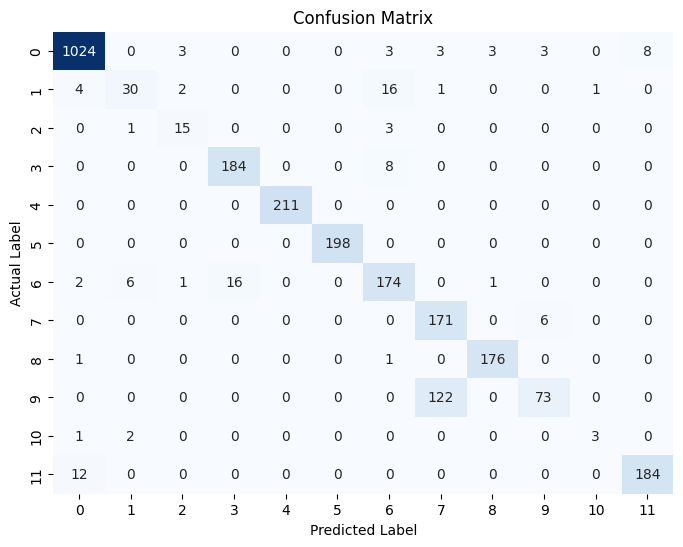

In [28]:
# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## Hyperparameter tuning using RandomSearch CV

In [29]:
# Define the hyperparameter grid for RandomForestClassifier
param_distributions = {
    'n_estimators': [50, 100, 200, 300, 400],      # Number of trees
    'max_depth': [None, 10, 20, 30, 40, 50],       # Maximum depth of trees
    'min_samples_split': [2, 5, 10],               # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],                 # Minimum number of samples per leaf
    'bootstrap': [True, False],                    # Whether to use bootstrap samples
    'max_features': ['sqrt', 'log2']               # Number of features to consider for the best split (removed 'auto')
}

In [30]:
# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [31]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, 
                                   param_distributions=param_distributions,  # Correct argument name
                                   n_iter=10,          # Number of parameter settings that are sampled
                                   cv=3,               # Number of cross-validation folds
                                   verbose=2,          # Show progress
                                   random_state=42,    # Reproducibility
                                   n_jobs=-1)          # Use all available processors

In [32]:
# Fit RandomizedSearchCV to the PCA-transformed training data
random_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300,
                                                         400]},
                   random_state=42, verbose=2)

In [33]:
# Get the best hyperparameters
best_params = random_search.best_params_
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': False}


In [34]:
# Train the model using the best parameters
best_model = random_search.best_estimator_

In [35]:
# Evaluate the best model
y_pred_best = best_model.predict(X_test_pca)

In [36]:
# Calculate various metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

In [37]:
# Print the results
print(f"Best Model Accuracy: {accuracy_best:.2f}")
print(f"Best Model Precision: {precision_best:.2f}")
print(f"Best Model Recall: {recall_best:.2f}")
print(f"Best Model F1-Score: {f1_best:.2f}")

Best Model Accuracy: 0.91
Best Model Precision: 0.92
Best Model Recall: 0.91
Best Model F1-Score: 0.90


In [38]:
# Confusion Matrix for the best model
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

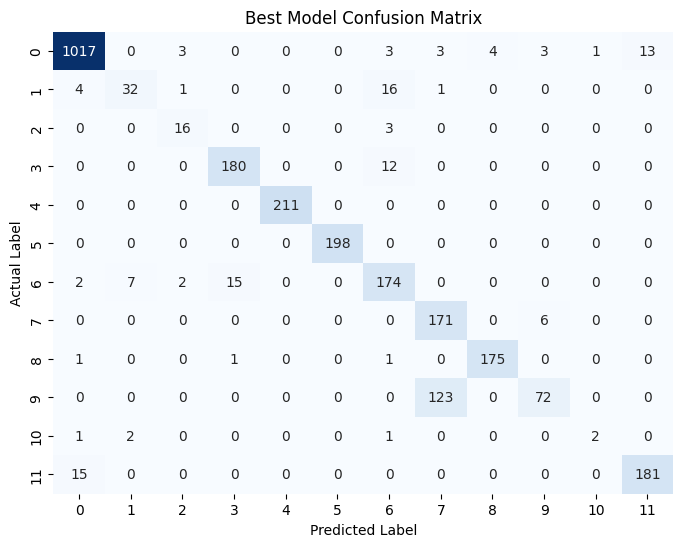

In [39]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Best Model Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [43]:
# Save the trained model using joblib
joblib.dump(model, "best_model.joblib")

['best_model.joblib']